In [1]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [4]:
DATASET_PATH = "/home/ec2-user/fashion_data_extracted/fashion-dataset/images"


<class 'list'>
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg


<ipython-input-5-72b326812c26>:37: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  axis.append(fig.add_subplot(row, col, i+1))


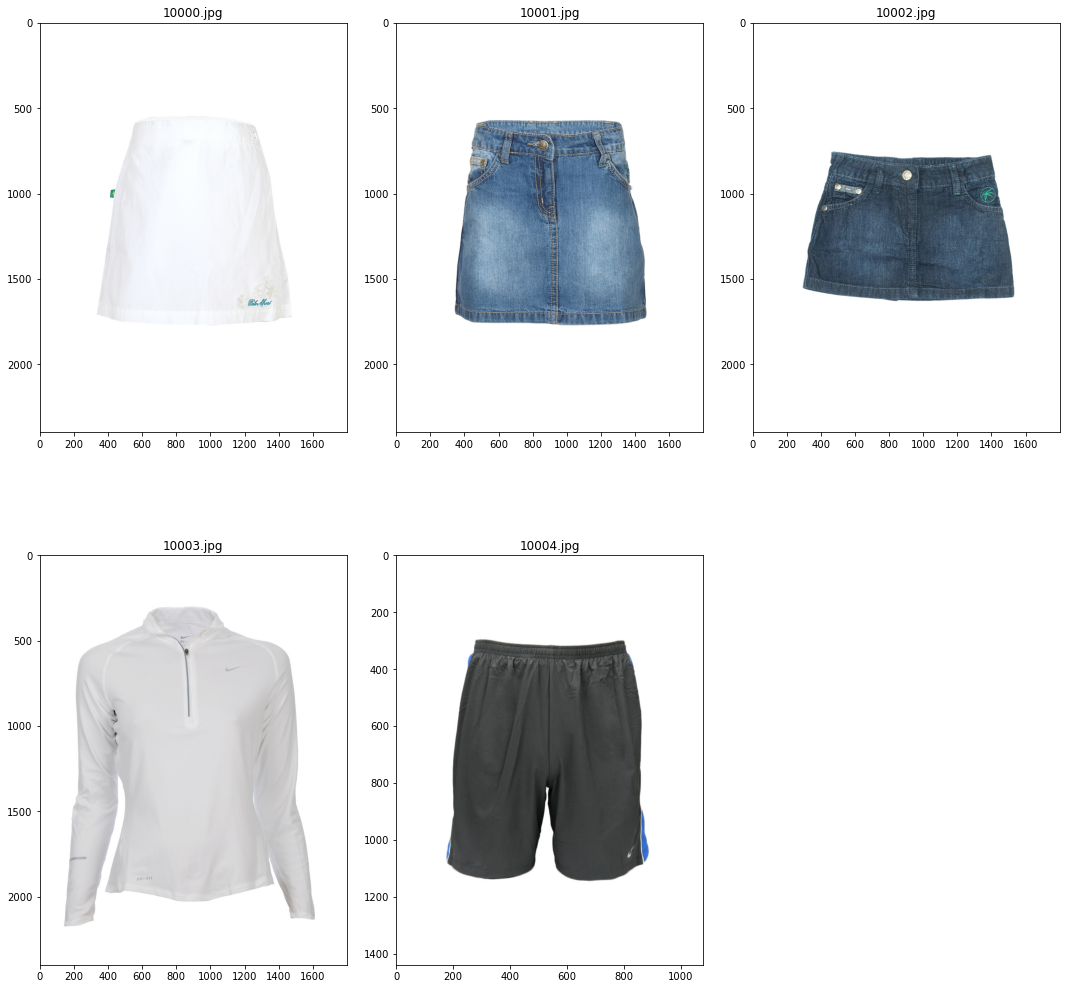

In [5]:
# what is inside the main directory
'''list_directory = os.listdir(DATASET_PATH)
print(list_directory)

# each time directory files gets reordered. That's why needed to find where images folder is.
index=0
for i in range (len(list_directory)):
    if list_directory[i]=="images":
        index=i
        break'''

#what is in the image directory
imageIndex = os.listdir(DATASET_PATH)
print(type(imageIndex))
head = 5

# collecting some samples in list
sampleImages = []

# showing indices
for i in range (head):
    sampleImages.append(imageIndex[i])
    print(sampleImages[i])

# choosing some samples to observe
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
row = len(sampleImages)/2
col = row+1

for i in range (len(sampleImages)):
    Image_path=DATASET_PATH+"/"+sampleImages[i]
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(row, col, i+1))
    subplot_title=sampleImages[i]
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)

fig.tight_layout()
plt.show()

In [6]:
df = pd.read_csv("/home/ec2-user/styles.csv", error_bad_lines=False)
df.head(10)

,img_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [7]:
df['image'] = df.apply(lambda row: str(row['img_id']) + ".jpg", axis=1)
df.head(10)

,img_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


In [8]:
df.shape

(44446, 11)

In [9]:
AugDataframe = pd.DataFrame({
    'filename': df['image'],
    'type': df['articleType']
})

# total number of entries in the dataframe
total_row = len(AugDataframe)
print('total row count: ', total_row)

AugDataframe.head(10)

total row count:  44446


,filename,type
0,15970.jpg,Shirts
1,39386.jpg,Jeans
2,59263.jpg,Watches
3,21379.jpg,Track Pants
4,53759.jpg,Tshirts
5,1855.jpg,Tshirts
6,30805.jpg,Shirts
7,26960.jpg,Shirts
8,29114.jpg,Socks
9,30039.jpg,Watches


In [10]:
unique_types = AugDataframe['type'].unique().tolist()
total_class = len(unique_types)
print(total_class)
print(unique_types)
print(unique_types[0])
print(unique_types.index(unique_types[0]))
AugDataframe['number_types'] = AugDataframe['type'].apply(lambda x: unique_types.index(x) if x in unique_types else 0)
AugDataframe.head(10)

143
['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks', 'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra', 'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant', 'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas', 'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees', 'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests', 'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket', 'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring', 'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers', 'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta', 'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics', 'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser', 'Necklace and Chains', 'Duffel Bag', 'Sports Sandals', 'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag', 'Tracksuits', 'Swimwear', 'Shoe Laces', 'Fragrance Gift Set', 'Bangle', 'Nightdress', 'Ties', 'Baby Dolls', 'Legging

,filename,type,number_types
0,15970.jpg,Shirts,0
1,39386.jpg,Jeans,1
2,59263.jpg,Watches,2
3,21379.jpg,Track Pants,3
4,53759.jpg,Tshirts,4
5,1855.jpg,Tshirts,4
6,30805.jpg,Shirts,0
7,26960.jpg,Shirts,0
8,29114.jpg,Socks,5
9,30039.jpg,Watches,2


In [11]:
AugDataframe['type'].value_counts()

Tshirts                7070
Shirts                 3217
Casual Shoes           2846
Watches                2542
Sports Shoes           2036
                       ... 
Cushion Covers            1
Body Wash and Scrub       1
Hair Accessory            1
Shoe Laces                1
Ipad                      1
Name: type, Length: 143, dtype: int64

In [13]:
def getData(start,stop):
    x_data = []
    y_data = []
    #start = 0 #setting start parameter
    #stop = int(0.001*total_row) #setting stop parameter 
    
    for i in range(start, stop): 
        Image_path=DATASET_PATH+"/"+AugDataframe.loc[i,'filename']
#         print(AugDataframe.loc[i,'filename'])
        image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
        try:
            resized_img = cv2.resize(image, dsize=(30, 40))
        except:
            print("Rejected Image: "+AugDataframe.loc[i,'filename'])
            continue
        x_data.append(resized_img) 
        y_values = AugDataframe.loc[i,'number_types'] # earlier it was type
        y_data.append(y_values)
                
    return x_data, y_data

In [14]:
X=[]
Y=[]

start = 0
stop = int(0.001*total_row) # testing with 0.1% image of the dataset
X,Y=getData(start,stop)

<class 'list'>
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


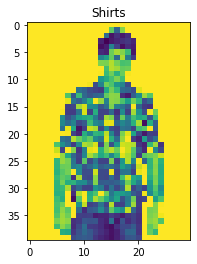

In [15]:
print(type(X))
print(X[0])
plt.title(unique_types[Y[0]])
plt.imshow(X[0])

In [16]:
X = np.array(X).reshape(-1, 30,40,1)
Y = np.array(Y)

In [17]:
X = X/255.0

In [18]:
Y = Y.reshape(len(X),)

In [19]:
print(type(X))
print(X.shape)
print(Y.shape)
print(X[0])
print(Y[0])

<class 'numpy.ndarray'>
(44, 30, 40, 1)
(44,)
[[[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [0.08235294]
  [0.14117647]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 ...

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [0.75294118]
  [0.13333333]
  [0.23137255]]

 [[0.37254902]
  [0.18823529]
  [0.17647059]
  ...
  [0.21960784]
  [0.33333333]
  [0.34117647]]

 [[0.16470588]
  [1.        ]
  [0.76862745]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]]
0


In [20]:
X=[]
Y=[]
start = 0
stop = total_row
X,Y=getData(start,stop)

# conversion into numpy array
X = np.array(X).reshape(-1, 30,40,1)
Y = np.array(Y)

# normalizing
X = X/255

# processing Y_train for dimension matching
Y = Y.reshape(len(X),)

Rejected Image: 39403.jpg
Rejected Image: 39410.jpg
Rejected Image: 39401.jpg
Rejected Image: 39425.jpg
Rejected Image: 12347.jpg


In [21]:
print('Image Data Shape: ',X.shape)
print('Label Data Shape: ',Y.shape)

Image Data Shape:  (44441, 30, 40, 1)
Label Data Shape:  (44441,)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 500)

In [24]:
print('Train Image Data Shape: ',X_train.shape)
print('Train Label Data Shape: ',Y_train.shape)
print('Test Image Data Shape: ',X_test.shape)
print('Test Label Data Shape: ',Y_test.shape)

Train Image Data Shape:  (39996, 30, 40, 1)
Train Label Data Shape:  (39996,)
Test Image Data Shape:  (4445, 30, 40, 1)
Test Label Data Shape:  (4445,)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
import datetime, os
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(30,40,1)
    ),MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=64, max_value=256, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),MaxPooling2D(pool_size=(2, 2)),
     keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=128, max_value=512, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ), 
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(units = total_class, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [26]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=2,directory='output',project_name="CNN2")

In [ ]:
tuner_search.search(X_train,Y_train,epochs=20,validation_split=0.1)

Trial 2 Complete [00h 05m 11s]
val_accuracy: 0.7876438498497009

Best val_accuracy So Far: 0.7876438498497009
Total elapsed time: 00h 09m 42s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_search

In [ ]:
models = tuner_search.get_best_models(num_models=1)
best_model = models[0]

In [ ]:
best_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 38, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 19, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 15, 224)       179424    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 7, 224)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 3, 224)         1254624   
_________________________________________________________________
flatten (Flatten)            (None, 672)               0         
_________________________________________________________________
dense (Dense)                (None, 96)                6

In [ ]:
best_model.fit(X_train,Y_train,epochs=30,validation_split=0.1, initial_epoch=3)

Epoch 4/30
1125/1125 [==============================] - 16s 14ms/step - loss: 0.1970 - accuracy: 0.9288 - val_loss: 1.1548 - val_accuracy: 0.7736
Epoch 5/30
1125/1125 [==============================] - 15s 14ms/step - loss: 0.1756 - accuracy: 0.9379 - val_loss: 1.2314 - val_accuracy: 0.7859
Epoch 6/30
1125/1125 [==============================] - 15s 14ms/step - loss: 0.1562 - accuracy: 0.9453 - val_loss: 1.3190 - val_accuracy: 0.7786
Epoch 7/30
1125/1125 [==============================] - 15s 14ms/step - loss: 0.1516 - accuracy: 0.9450 - val_loss: 1.3052 - val_accuracy: 0.7689
Epoch 8/30
1125/1125 [==============================] - 15s 14ms/step - loss: 0.1454 - accuracy: 0.9470 - val_loss: 1.1937 - val_accuracy: 0.7734
Epoch 9/30
1125/1125 [==============================] - 15s 14ms/step - loss: 0.1328 - accuracy: 0.9531 - val_loss: 1.3731 - val_accuracy: 0.7736
Epoch 10/30
1125/1125 [==============================] - 15s 14ms/step - loss: 0.1201 - accuracy: 0.9591 - val_loss: 1.3995 

In [ ]:
best_model.save('/home/ec2-user/cnn-image_keras.h5')

In [27]:
from keras import models

In [28]:
model = models.load_model('/home/ec2-user/cnn-image_keras.h5')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 38, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 19, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 15, 224)       179424    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 7, 224)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 3, 224)         1254624   
_________________________________________________________________
flatten (Flatten)            (None, 672)               0         
_________________________________________________________________
dense (Dense)                (None, 96)                6

In [32]:
predicted_classes = model.predict(X_test)

In [33]:
predicted_class=np.argmax(predicted_classes,axis=1)

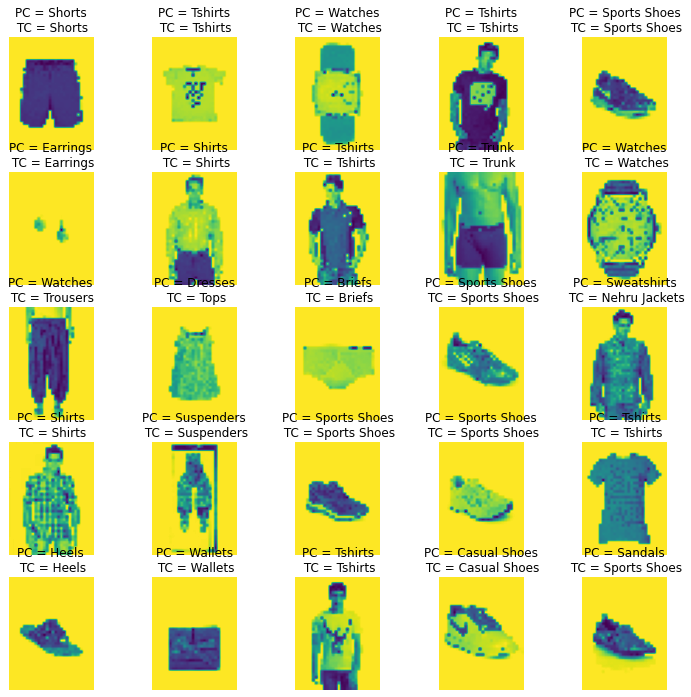

In [34]:
#PC=PredictedClass #TC=TrueClass
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(40,30))
    axes[i].set_title(f"PC = {unique_types[predicted_class[i]]}\n TC = {unique_types[Y_test[i]]}") #predicted_classes[i]:0.1f #Y_test[i]:0.1f
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)